In [1]:
import xarray as xr
import matplotlib.pyplot as plt
from cmocean import cm 
import numpy as np
import pandas as pd
from scipy.integrate import cumtrapz
from scipy.integrate import cumulative_trapezoid
from tqdm import tqdm

In [3]:
ds = xr.open_dataset(r'../data/amazon2.nc')
ds_w = xr.open_dataset(r'w.nc')

In [5]:
print(ds_w)
print(ds)

<xarray.Dataset>
Dimensions:  (depth: 50, lat: 177, lon: 199)
Coordinates:
  * depth    (depth) float32 0.494 1.541 2.646 ... 4.833e+03 5.275e+03 5.728e+03
  * lat      (lat) float32 -3.667 -3.583 -3.5 -3.417 ... 10.75 10.83 10.92 11.0
  * lon      (lon) float32 -57.75 -57.67 -57.58 -57.5 ... -41.42 -41.33 -41.25
Data variables:
    w        (depth, lat, lon) float32 ...
<xarray.Dataset>
Dimensions:    (time: 10, depth: 50, latitude: 177, longitude: 199)
Coordinates:
  * time       (time) datetime64[ns] 2021-06-01 2021-06-02 ... 2021-06-10
  * depth      (depth) float32 0.494 1.541 2.646 ... 5.275e+03 5.728e+03
  * latitude   (latitude) float32 -3.667 -3.583 -3.5 -3.417 ... 10.83 10.92 11.0
  * longitude  (longitude) float32 -57.75 -57.67 -57.58 ... -41.42 -41.33 -41.25
Data variables:
    uo         (time, depth, latitude, longitude) float32 ...
    vo         (time, depth, latitude, longitude) float32 ...
Attributes:
    Conventions:       CF-1.11
    title:             daily mean fi

In [9]:
u=ds.uo.isel(time=0,longitude=slice(98,100),latitude=slice(98,100))
v=ds.vo.isel(time=0,longitude=slice(98,100),latitude=slice(98,100))
w=ds_w.w.isel(lon=slice(98,100),lat=slice(98,100))

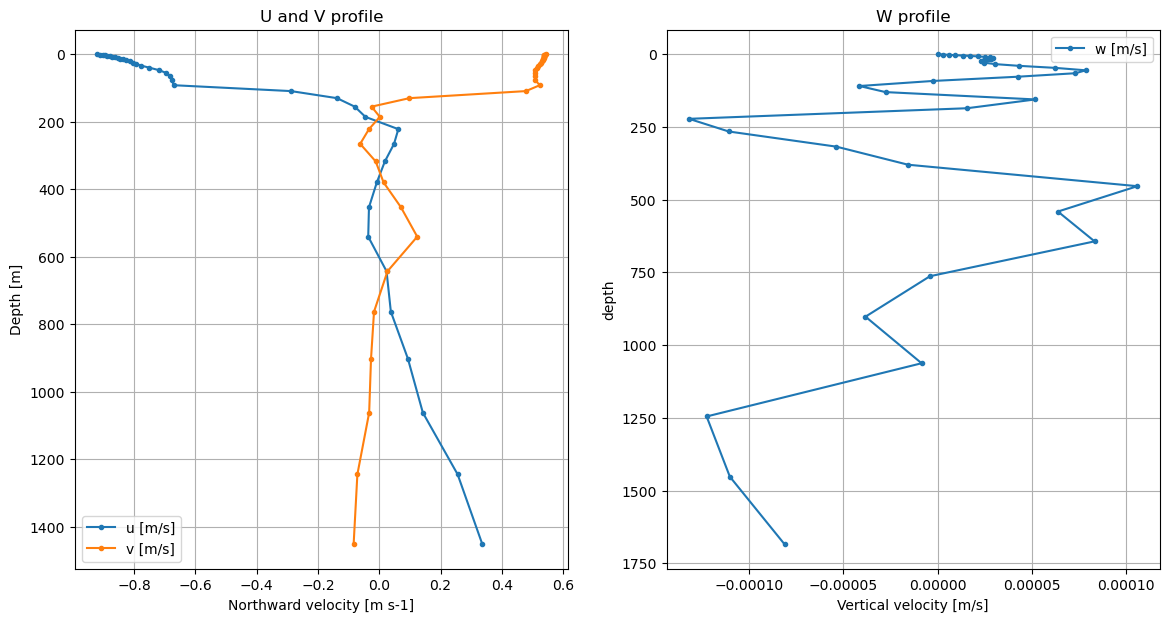

In [36]:
fig,ax = plt.subplots(1,2,figsize=(14,7))

u.isel(longitude=1,latitude=1).plot(y='depth',marker='.',label='u [m/s]',ax=ax[0])
v.isel(longitude=1,latitude=1).plot(y='depth',marker='.', label='v [m/s]',ax=ax[0])
ax[0].invert_yaxis()
ax[0].grid('minor')
ax[0].legend()
ax[0].set_title("U and V profile")

w.isel(lon=1,lat=1).plot(y='depth',marker='.', label='w [m/s]',ax=ax[1])

ax[1].invert_yaxis()
ax[1].grid('minor')
ax[1].legend()
ax[1].set_title("W profile")

plt.legend()

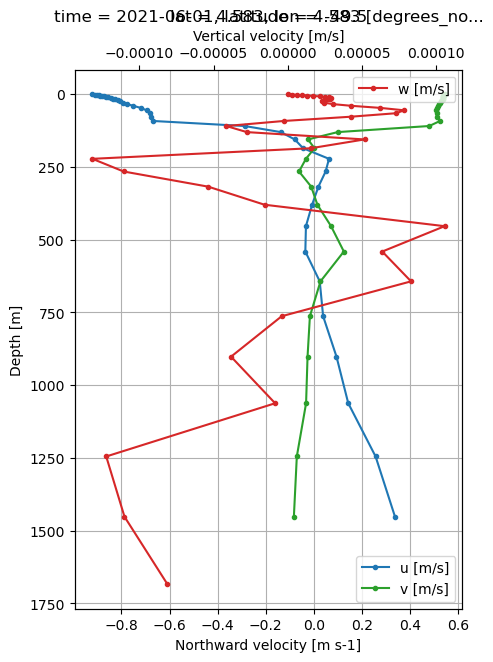

In [41]:
fig, ax = plt.subplots(figsize=(5, 7))

# Eje inferior: u y v
u.isel(longitude=1, latitude=1).plot(
    y='depth', marker='.', label='u [m/s]', ax=ax, color='tab:blue'
)
v.isel(longitude=1, latitude=1).plot(
    y='depth', marker='.', label='v [m/s]', ax=ax, color='tab:green'
)

ax.invert_yaxis()
ax.grid('minor')
ax.legend(loc='lower right')
# ax.set_title("Profiles of u, v and w")

# Eje superior: w
ax2 = ax.twiny()
w.isel(lon=1, lat=1).plot(
    y='depth', marker='.', label='w [m/s]', ax=ax2, color='tab:red'
)

# Ejes bien alineados
# ax2.set_xlabel("w [m/s]")
ax2.legend(loc='upper right')


In [47]:
df = pd.DataFrame({
    "depth [m]": ds.depth.data,
    "u [m/s]": u.isel(longitude=1, latitude=1).data,
    "v [m/s]": v.isel(longitude=1, latitude=1).data,
    "w[m/s]": w.isel(lon=1, lat=1).data,
})
df
# print(u.isel(longitude=1, latitude=1).data)
# print(w.isel(lon=1, lat=1).data)

,depth [m],u [m/s],v [m/s],w[m/s]
0,0.494025,-0.920438,0.542619,0.000000
1,1.541375,-0.910062,0.540178,0.000003
2,2.645669,-0.900906,0.538957,0.000006
3,3.819495,-0.893582,0.538347,0.000009
4,5.078224,-0.886868,0.537736,0.000013
5,6.440614,-0.879543,0.537736,0.000017
6,7.929560,-0.871609,0.537126,0.000021
7,9.572997,-0.863063,0.537126,0.000025
8,11.405000,-0.853908,0.536515,0.000028
9,13.467140,-0.844752,0.535905,0.000029
